# Кластеризация и уменьшение размерности

Идея: давайте возьмем данные Титаника. Для него мы знаем, что там было основные 2 класса: колонка Survived. Попробуем провести кластеризацию таким образом, чтобы она хорошо отделяла выживших от невыживших. В принципе, можно было бы взять любую колонку, например Pclass.

Смотреть качество разделения на кластера, будем по метрике Adjusted Rand Index. Эта метрика оценивает качество  по уже имеющейся разметке. Кроме того, попробуем оценить качество кластеризации по метрикам interia_ и Silhouette, которые не требуют наличие разметки. Детальные описания метрик даны ниже

In [103]:
import pandas as pd

In [104]:
df = pd.read_csv('../lesson1/data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Предобработка
Нам нужно привести колонки к числовому виду и заполнить пропуски

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Пол:

In [42]:
df['Sex_float'] = df['Sex'].map({'male': 0, 'female':1})

### Город отправления

In [43]:
df['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

Самый частый город отправления – "S", заполним пропуски этим значением 

In [44]:
df['Embarked'].fillna('S', inplace=True)

In [45]:
dummpy_encodding = pd.get_dummies(df['Embarked'], prefix='Embarked')

In [46]:
df = pd.concat((df, dummpy_encodding), axis=1)

### Возраст

In [47]:
df['Age'].median()

28.0

In [48]:
df['Age'].fillna(df['Age'].median(), inplace=True)

### Датасет сформирован:

In [49]:
df_number_columns = df[['Pclass', 'Sex_float', 'Age', 'SibSp', 'Parch', 
                        'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
df_number_columns

,Pclass,Sex_float,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1
5,3,0,28.0,0,0,8.4583,0,1,0
6,1,0,54.0,0,0,51.8625,0,0,1
7,3,0,2.0,3,1,21.0750,0,0,1
8,3,1,27.0,0,2,11.1333,0,0,1
9,2,1,14.0,1,0,30.0708,1,0,0


## Кластеризация через KMeans
Мы хотим 2 кластера – это априорное знание.

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_number_columns)

In [51]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,

In [52]:
kmeans.cluster_centers_

array([[1.00000000e+00, 6.41509434e-01, 3.15833962e+01, 6.60377358e-01,
        8.86792453e-01, 1.87032858e+02, 5.47169811e-01, 0.00000000e+00,
        4.52830189e-01],
       [2.39140811e+00, 3.34128878e-01, 2.92210621e+01, 5.14319809e-01,
        3.49642005e-01, 2.24119425e+01, 1.65871122e-01, 9.18854415e-02,
        7.42243437e-01]])

## Измерим качество по готовой разметке

### Adjusted Rand Index (ARI)

Предполагается, что известны истинные метки объектов. Данная мера не зависит от самих значений меток, а только от разбиения выборки на кластеры. Пусть $N$ - число объектов в выборке. Обозначим через $a$ - число пар объектов, имеющих одинаковые метки и находящихся в одном кластере, через $b$ - число пар объектов, имеющих различные метки и находящихся в разных кластерах. Тогда Rand Index это $$\text{RI} = \frac{2(a + b)}{n(n-1)}.$$ То есть это доля объектов, для которых эти разбиения (исходное и полученное в результате кластеризации) "согласованы". Rand Index (RI) выражает схожесть двух разных кластеризаций одной и той же выборки. Чтобы этот индекс давал значения близкие к нулю для случайных кластеризаций при любом $N$ и числе кластеров, необходимо нормировать его. Так определяется Adjusted Rand Index: $$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.$$

Эта мера симметрична, не зависит от значений и перестановок меток. Таким образом, данный индекс является мерой расстояния между различными разбиениями выборки. $\text{ARI}$ принимает значения в диапазоне $[-1, 1]$. Отрицательные значения соответствуют "независимым" разбиениям на кластеры, значения, близкие к нулю, - случайным разбиениям, и положительные значения говорят о том, что два разбиения схожи (совпадают при $\text{ARI} = 1$).

Автор материала: старший преподаватель Факультета Компьютерных Наук ВШЭ, программист-исследователь Mail.ru Group Юрий Кашницкий

https://en.wikipedia.org/wiki/Rand_index

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

In [53]:
from sklearn import metrics
metrics.adjusted_rand_score(kmeans.labels_, df['Survived'])

0.042870343737399196

Метрика близка к 0 – наша кластеризация блазка к случайной

## Измерим качество кластеризации без учета меток

### Сумма квадратов расстояний до ближайшего центра:

In [54]:
kmeans.inertia_

1000262.7191729083

### Silhouette coefficient

Данный коэффициент не предполагает знания истинных меток объектов, и позволяет оценить качество кластеризации, используя только саму (неразмеченную) выборку и результат кластеризации. Сначала силуэт определяется отдельно для каждого объекта. Обозначим через $a$ - среднее расстояние от данного объекта до объектов из того же кластера, через $b$ - среднее расстояние от данного объекта до объектов из ближайшего кластера (отличного от того, в котором лежит сам объект). Тогда силуэтом данного объекта называется величина: $$s = \frac{b - a}{\max(a, b)}.$$
Силуэтом выборки называется средняя величина силуэта объектов данной выборки. Таким образом, силуэт показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. Данная величина лежит в диапазоне $[-1, 1]$. Значения, близкие к -1, соответствуют плохим (разрозненным) кластеризациям, значения, близкие к нулю, говорят о том, что кластеры пересекаются и накладываются друг на друга, значения, близкие к 1, соответствуют "плотным" четко выделенным кластерам. Таким образом, чем больше силуэт, тем более четко выделены кластеры, и они представляют собой компактные, плотно сгруппированные облака точек.

С помощью силуэта можно выбирать оптимальное число кластеров $k$ (если оно заранее неизвестно) - выбирается число кластеров, максимизирующее значение силуэта. В отличие от предыдущих метрик, силуэт зависит от формы кластеров, и достигает больших значений на более выпуклых кластерах, получаемых с помощью алгоритмов, основанных на восстановлении плотности распределения.

Автор материала: старший преподаватель Факультета Компьютерных Наук ВШЭ, программист-исследователь Mail.ru Group Юрий Кашницкий

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [109]:
metrics.silhouette_score(df_number_columns, kmeans.labels_)

0.15341793090434053

Сами по себе эти метрики ни о чем не говорят, т.к. сильно зависят от размерности простарнства и масштаба признаков. Но по ним можно выбрать количество кластеров. Может, в наших данных кластеров больше чем 2? 

Давайте пройдемся в цикле от 2 до 10-ти и построим метрики interia и silhouette

In [56]:
inertias = []
silhouettes = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_number_columns)
    inertias.append(kmeans.inertia_)
    silhouettes.append(metrics.silhouette_score(df_number_columns, kmeans.labels_))

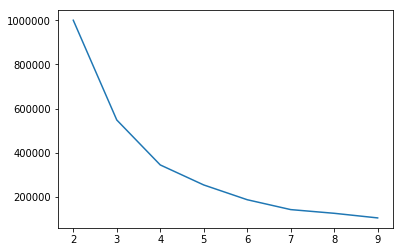

In [57]:
import matplotlib.pyplot as plt
plt.plot(range(2, 10), inertias)
plt.show()

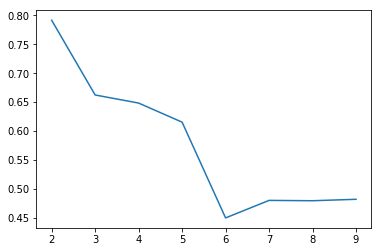

In [58]:
plt.plot(range(2, 10), silhouettes)
plt.show()

Чем interia меньше – тем лучше наша кластеризация. Понятно, что чем больше кластеров, тем меньше сумма квадратов расстояний до их центров. Так что было бы полезно сравнить наш график с тем, который получается для данных, которые распределены равномерно или, напротив, имеют четкую кластерную структуру

Для silhouette ситуация не такая однозначная. Давайте тоже посмотрим, как ведет себя эта матрика при разных распределениях в данных

### Случай равномерного распределения:

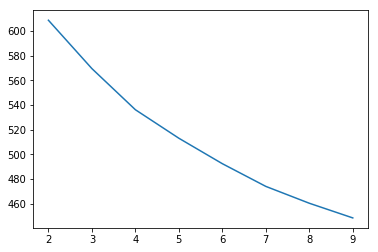

In [116]:
import numpy as np
uniform_distribution = np.random.uniform(size=df_number_columns.shape)

inertias = []
silhouettes = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(uniform_distribution)
    inertias.append(kmeans.inertia_)
    silhouettes.append(metrics.silhouette_score(uniform_distribution, kmeans.labels_))
    
plt.plot(range(2, 10), inertias)
plt.show()    

Для нормального распределения interia падает линейно относительно количества кластеров. В данных Титаника это не так – следовательно, данные там не совсем равномерные

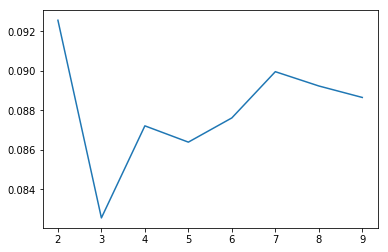

In [117]:
plt.plot(range(2, 10), silhouettes)
plt.show()

Видим, что метрика silhouette близка к 0, что свидетельствует об отсутствии кластерной структуры в данных. Колебания на графике слабые и следствие случайно сгенерированных данных. 

## Сгенерируем данные с 5-ю кластерами и нормальным распределением вокруг их центров.

In [122]:
from sklearn.datasets import make_blobs
normal_distribution = make_blobs(
    n_samples=len(df_number_columns), 
    n_features=len(df_number_columns.columns), 
    cluster_std=4.0,
    centers=5)[0]

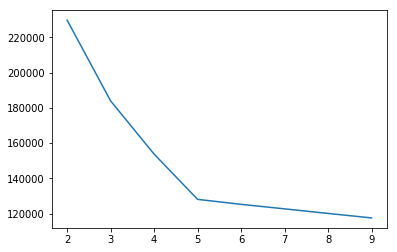

In [123]:
inertias = []
silhouettes = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(normal_distribution)
    inertias.append(kmeans.inertia_)
    silhouettes.append(metrics.silhouette_score(normal_distribution, kmeans.labels_))
    
plt.plot(range(2, 10), inertias)
plt.show()    

Видим, что inertia имеет излом на количестве кластеров 5: kMeans удалось правильно разбить данные на кластеры.

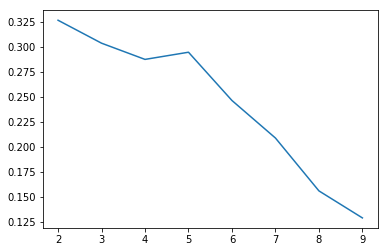

In [124]:
plt.plot(range(2, 10), silhouettes)
plt.show() 

silhouette тоже имеет довольно высокие значения в значении 5. Дальше interia стремительно падает. Большие значения в 2,3,4 можно объяснить тем, что мы генерировали кластера так, чтобы они пересекались друг с другом.

Выполните код для генерации данных и вычисления метрик несколько раз, посмотрите, как варьируются графики метрик. 

# Scale

В самом начале мы допустили ошибку: мы не отнормировали признаки. Действительно, если двух признаков будет разный масштаб (а kmeans работает с Эйлеровым пространством), то тот признак, у которого дисперсия больше, окажется более значимым для кластеризации. Мы можем использовать этот факт, наделяя разные признаки разной степенью значимости для кластеризации. Но давайте сейчас пойдем по простому пути и приведем все признаки к одному масштабу: отнимем в каждой колонке ее среднее значение и поделим на стандартное отклонение. Для этого в sklearn есть класс StandardScaler

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_number_columns_scaled = scaler.fit_transform(df_number_columns)

In [130]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_number_columns_scaled)

In [131]:
kmeans.inertia_

6311.330968659822

Видим, что inertia уменьшилась. Видимо, данные у нас варьировались в большем масштабе, чем после scale'а. К сожалению, после изменения данных, любые метрики, которые опираются на расстояния (а все метрики, не использующие метки, обладают этим свойством), нельзя сравнивать с предыдущими их значениями. 

In [80]:
metrics.adjusted_rand_score(kmeans.labels_, df['Survived'])

0.043757441014502185

adjusted_rand_score остался неизменным – масштабирование не помогло. Давайте заново проведем эксперименты для определения "хорошего" значения кол-ва кластеров в данных. 

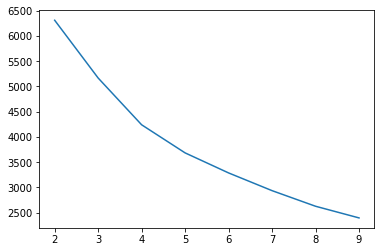

In [81]:
inertias = []
silhouettes = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_number_columns_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(metrics.silhouette_score(df_number_columns_scaled, kmeans.labels_))
    
import matplotlib.pyplot as plt
plt.plot(range(2, 10), inertias)
plt.show()

График inertia стал еще больше похож на случай равномерного распределения. Но он учитывает только расстояния внутри кластеров, игнорируя межкластерные расстояния

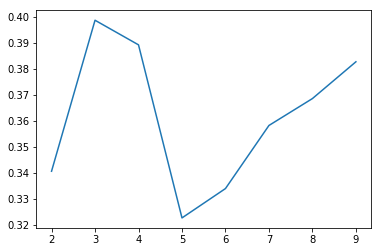

In [82]:
plt.plot(range(2, 10), silhouettes)
plt.show()

А вот график silhouette нам говорит, что в данных 3-4 кластера. Значения метрики конечно не ~1, так что говорить о каких-то четких границах кластеров не приходится. Можем констатировать, что, в среднем, чужой кластер для точки на 40% дальше, чем свой.

## Понижение размерности

Вследствие того, что kmeans работает в пространстве Эйлера, он подвержен так называемому "проклятию размерности". Это эффект, когда с увеличением размерности пространства, точки становятся одинаково далеки друг от друга. 
![](http://nikhilbuduma.com/img/dimension_sparsity.png)

Эффект в разных данных проявляется на разных значениях размерности. В текстах я его замечал на значениях >1000. Что далеко от нашей ситуации с несколькими колонками. Но давайте попрактикуемся

### PCA
Перед применением PCA важно отшкалировать и отнормировать данные, соотв. мы будем пользоваться df_number_columns_scaled

In [139]:
df_number_columns_scaled.shape

(891, 9)

In [140]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_number_columns_scaled)
pca.explained_variance_ratio_

array([0.23949963, 0.19635608])

Значение explained_variance_ratio_ показывает, сколько информациии изначального датасета содержится в каждой из новых компонент. 

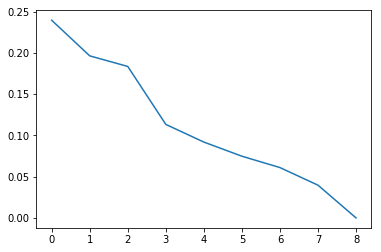

In [142]:
pca = PCA()
pca.fit(df_number_columns_scaled)
plt.plot(pca.explained_variance_ratio_);

Видим, что колонки после pca отсортированны в обратном порядке по количеству "сохраняемой" информации. 

Построим кумулятивный график:

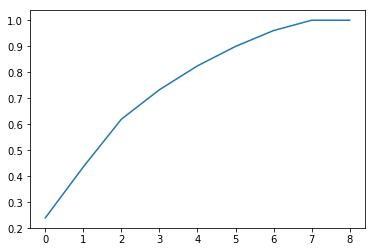

In [143]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

Можно заметить, что 9-ая колонка (под номером 8) не добавляет информации. Видимо, в наших данных была линейная зависимость, которую мы с помощью PCA можем избежать.

Еще одно полезное применение понижения размерности, что при размерности 2D или 3D, мы сможем посмотреть на наши данные. 

In [146]:
df_number_columns_scaled_pca = PCA(n_components=2).fit_transform(df_number_columns_scaled)

/Users/yellowduck/miniconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


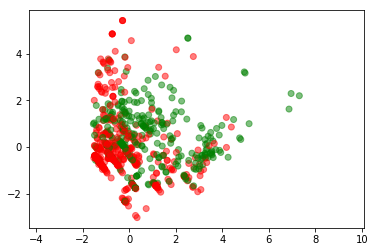

In [147]:
df['Survived_color'] = df['Survived'].map({1: 'g', 0: 'r'}) 
plt.scatter(df_number_columns_scaled_pca[:,0], df_number_columns_scaled_pca[:,1], 
            c=df['Survived_color'], alpha=0.5)
plt.axes().set_aspect('equal', 'datalim');

Я здесь раскрасил точки в 2 цвета по имеющимся лейблам. Что мы можем увидеть на этом графике:

- Зеленые и красные точки распределены в разных областях графика. Наверное, supervised алгоритмы справились бы с классификацией. 
- Если убрать цвет, никакой алгоритм кластеризации не разделит красные и зеленые точки на 2 кластера. 

Запустим KMeans на новых данных и посмотрим, изменилась ли метрика adjusted_rand_score:

In [93]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_number_columns_scaled_pca)
metrics.adjusted_rand_score(kmeans.labels_, df['Survived'])

0.08774122170332106

### T-SNE:

Мы можем попробовать нелинейное преобразование пространства. 
Суть T-SNE хорошо описана в видео https://www.youtube.com/watch?v=NEaUSP4YerM

In [148]:
from sklearn.manifold import TSNE
df_number_columns_scaled_tsne = TSNE(n_components=2).fit_transform(df_number_columns_scaled)

/Users/yellowduck/miniconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


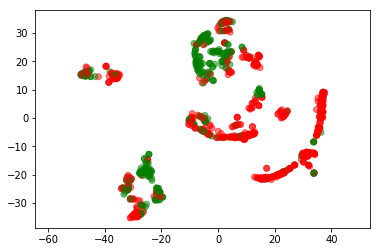

In [149]:
plt.scatter(df_number_columns_scaled_tsne[:,0], df_number_columns_scaled_tsne[:,1], 
            c=df['Survived_color'], alpha=0.5)
plt.axes().set_aspect('equal', 'datalim');

Как видите, T-SNE работает существенно медленнее, но итог выглядит намного лучше. Без информации о метках классов, алгоритм смог разбить данные на визуальные подгруппы, где явно прослеживается превосходство зеленого или красного цвета

Попробуем применить KMeans для полученных данных:

In [152]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_number_columns_scaled_tsne)
metrics.adjusted_rand_score(kmeans.labels_, df['Survived'])

0.04472454883276761

Метрика не улучшились. В этом нет ничего удивительного, т.к. kMeans доля 2-класстерного случая пытается провести линию между сгустками точек. Т.е. поделит пространство на 2 части линией. У нас же кластера имеют более хитрую структуру. Для такого случая  таких данных хорошо подойдет алгоритм DBSCAN 

Кроме того, визуально кластеров 4 шт, а не 2. Так что без частичной разметки данных (чтобы определить "зеленый" у нас кластер или "красный") нам не обойтись